# Embedded Methods in Feature Selection

### 👉 Definition:

Embedded methods are feature selection techniques where the algorithm itself selects the important features during training. Unlike Filter (based on statistical tests) and Wrapper (based on iterative model training), embedded methods combine model training + feature selection in one process.

- L1 and L2 Regularization
- Random Forest Importance

## 📌 L1 Regularization (Lasso Regression)
### 🔹 1. What is Regularization?

Regularization is a technique to prevent overfitting by adding a penalty to the model’s loss function. It discourages the model from giving very large weights to any feature.

🔹 2. L1 Regularization Formula

In normal Linear Regression, we minimize MSE (Mean Squared Error):

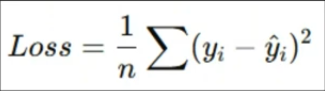

👉 In L1 Regularization (Lasso), we add a penalty:

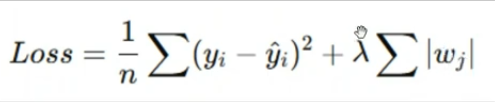

Where:

𝑤𝑗 = coefficients (weights of features)

λ = regularization strength (controls penalty size)

### 🔹 3. What Happens in L1 (Lasso)?

- The absolute value penalty (∣w∣) makes optimization push some coefficients to exactly 0.
- This means irrelevant features are completely removed from the model.
- So, L1 is not just for preventing overfitting – it also acts as a feature selection method.

🔹 4. Intuition with Example

Suppose you are predicting House Price with features:

- Size (sq ft)
- Location
- Age of house
- Number of rooms
- Color of the front door

👉 In ordinary regression, it will assign some coefficient to all.

👉 In Lasso (L1), if "Color of front door" has no predictive power, the coefficient will be forced to 0.

So the final model uses only important features like Size, Location, Rooms.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

### 1. Create a sample dataset

In [3]:
data = {
    "Size": [1200, 1500, 800, 2000, 1700, 1000, 2200, 1600, 900, 1400],
    "Location": ["City", "Suburb", "Village", "City", "Suburb", "Village", "City", "Village", "Suburb", "City"],
    "Age": [10, 5, 20, 2, 8, 25, 1, 30, 15, 12],
    "Rooms": [3, 4, 2, 5, 4, 2, 6, 3, 2, 4],
    "Door_Color": ["Red", "Blue", "Green", "Red", "Blue", "Green", "Red", "Blue", "Green", "Red"],
    "Price": [200000, 250000, 150000, 400000, 320000, 120000, 500000, 220000, 130000, 280000]
}

In [4]:
df = pd.DataFrame(data)

In [5]:
X = df.drop("Price", axis=1)
y = df["Price"]

### 2. Preprocessing

In [6]:
categorical = ["Location", "Door_Color"]
numeric = ["Size", "Age", "Rooms"]

In [7]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical),
        ("num", "passthrough", numeric)
    ]
)

### 3. Build Lasso (L1) Model

In [8]:
lasso = Lasso(alpha=1000)  # alpha controls regularization strength


In [9]:
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("regressor", lasso)])

In [10]:
# Fit model
model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Location', 'Door_Color']),
                                                 ('num', 'passthrough',
                                                  ['Size', 'Age', 'Rooms'])])),
                ('regressor', Lasso(alpha=1000))])

### 4. Get feature names + coefficients

In [12]:
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical)
feature_names = list(cat_features) + numeric

coefficients = model.named_steps["regressor"].coef_

coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
print(cat_features)
print("----------------")
print(feature_names)
print("----------------")
print(coef_df)


['Location_Suburb' 'Location_Village' 'Door_Color_Green' 'Door_Color_Red']
----------------
['Location_Suburb', 'Location_Village', 'Door_Color_Green', 'Door_Color_Red', 'Size', 'Age', 'Rooms']
----------------
            Feature   Coefficient
0   Location_Suburb -15202.675663
1  Location_Village      0.000000
2  Door_Color_Green  29418.299963
3    Door_Color_Red      0.000000
4              Size    118.225774
5               Age  -1451.987165
6             Rooms  49314.563679


### 5. Plot coefficients

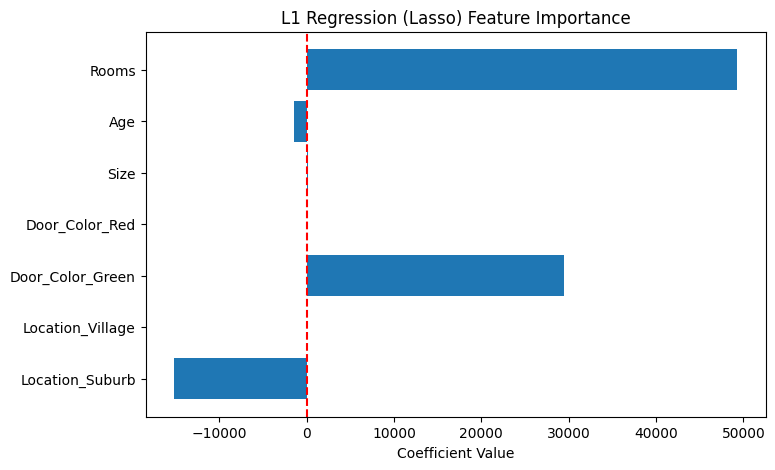

In [14]:
plt.figure(figsize=(8, 5))
plt.barh(coef_df["Feature"], coef_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("L1 Regression (Lasso) Feature Importance")
plt.axvline(x=0, color='r', linestyle='--')
plt.show()